In [1]:
!pip3 install folium


In [2]:
!pip install matplotlib


In [3]:
!pip install pandas
!pip install numpy
!pip install json 
!pip install requests 


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [4]:
import folium
from matplotlib import colors as mcolors

In [5]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as pp
import numpy as np
import json
import requests
from datetime import datetime
import time


In [6]:
m = folium.Map(
    location=[60, 18],
    zoom_start=5, control_scale=True )

In [7]:
m

In [8]:
url='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/1.json'
response=requests.get(url) 
data4=json.loads(response.text)
df4=DataFrame(data4['station'])
df4.columns
#print(df4.name)
print(df4[['latitude','longitude','id','name','height','active']] )


     latitude  longitude        id                    name   height  active
0     59.3098    14.2919  17121000  1712 Ristjärn Fjärryta    0.000    True
1     65.5300    14.9700    154860         Abelvattnet Aut  665.000   False
2     68.3538    18.8166    188800                  Abisko  393.380   False
3     68.3538    18.8164    188790              Abisko Aut  392.303    True
4     65.9857    18.9195    158990                  Abraur  368.079    True
..        ...        ...       ...                     ...      ...     ...
952   66.2646    22.8365    172790      Överkalix-Svartbyn   46.000   False
953   66.2618    22.8427    172770    Överkalix-Svartbyn A   61.024    True
954   66.3860    23.6155    173810              Övertorneå   59.508    True
955   63.7788    13.0734    133470                 Överäng  450.000   False
956   58.3500    16.8333     86700             Övre Gränsö    5.000   False

[957 rows x 6 columns]


In [9]:
df5=df4[(df4.active==True)]
print(len(df5))
#df6=df5[(df5.id<10000000)]
#print(len(df6))
I=0
for i in df5.id:
#    print(i)

    print(I)
    url='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/1/station/'+str(i)+'/period/latest-hour/data.json'
    url2='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/6/station/'+str(i)+'/period/latest-hour/data.json'
    response=requests.get(url)
    if response.status_code == 200:
        data=json.loads(response.text)
        df=DataFrame(data['value'])
        if df.empty == 0:
            _=df.rename(columns={'value':'T'},inplace=True)
            df['date'] = pd.to_datetime(df['date']/1000,unit='s') 
            df['id'] = i 
            if I==0:
                df7=df
            else:
                df7=pd.concat([df7,df],axis=0, join='outer')
    response=requests.get(url2)
    if response.status_code == 200:
        data=json.loads(response.text)
        df=DataFrame(data['value'])
        if df.empty == 0:
            _=df.rename(columns={'value':'rh'},inplace=True)
            df['date'] = pd.to_datetime(df['date']/1000,unit='s') 
            df['id'] = i 
            if I==0:
                df7rh=df
            else:
                df7rh=pd.concat([df7rh,df],axis=0, join='outer')
            I+=1


299
0
0
1
1
2
2
2
3
4
5
5
6
6
7
8
8
8
9
10
11
12
12
13
13
14
15
16
17
18
19
19
20
21
22
22
23
23
23
24
24
25
26
27
27
28
28
29
30
30
31
32
32
33
34
35
36
36
37
38
39
39
40
41
42
42
43
43
43
44
45
46
47
48
49
50
51
51
52
53
54
55
55
55
56
57
58
59
60
60
60
61
61
62
62
62
63
64
64
64
64
65
66
66
67
67
68
68
68
69
70
71
72
72
73
73
74
74
75
76
77
78
79
80
81
82
83
84
85
85
85
86
87
88
89
90
90
91
91
92
92
93
93
93
94
94
95
95
96
97
97
97
97
98
98
99
100
101
102
103
104
104
105
105
105
105
106
107
107
108
109
109
110
111
112
113
114
114
115
116
117
117
117
117
117
117
117
118
119
120
121
122
123
123
123
123
124
125
126
127
128
128
128
129
129
130
130
130
131
131
132
133
134
135
136
136
136
136
137
138
139
139
140
141
142
143
144
145
145
146
146
146
147
148
149
150
151
152
153
153
153
154
155
156
156
157
157
158
159
160
161
161
162
163
164
164
165
166
167
168
169
169
169
170
171
171
172
173
174
175
176
176
176
176
177
177
178
179
179
180
180
181
182
183
184
184
185
185
185
185
186
187
188
1

In [10]:
df8=df5.merge(df7,how='inner',on='id') 
df8=df8.merge(df7rh,how='inner',on='id') 
df8['T'] = df8['T'].astype('float')
df8['rh'] = df8['rh'].astype('float')
df8['longitude'] = df8['longitude'].astype('float')
df8['latitude'] = df8['latitude'].astype('float')

print(df8)

                           name                         owner ownerCategory  \
0                    Abisko Aut  Polarforskningssekretariatet       CLIMATE   
1                      Adelsö A                          SMHI       CLIMATE   
2                    Arjeplog A                          SMHI       CLIMATE   
3                  Arvidsjaur A                          SMHI       CLIMATE   
4                      Arvika A                          SMHI       CLIMATE   
..                          ...                           ...           ...   
191     Örnsköldsviks Flygplats       Örnsköldsvik Airport AB       CLIMATE   
192                    Örskär A                          SMHI       CLIMATE   
193            Östergarnsholm A                          SMHI       CLIMATE   
194  Östersund-Frösön Flygplats                      Swedavia       CLIMATE   
195        Överkalix-Svartbyn A                          SMHI       CLIMATE   

    measuringStations      id   height  latitude  l

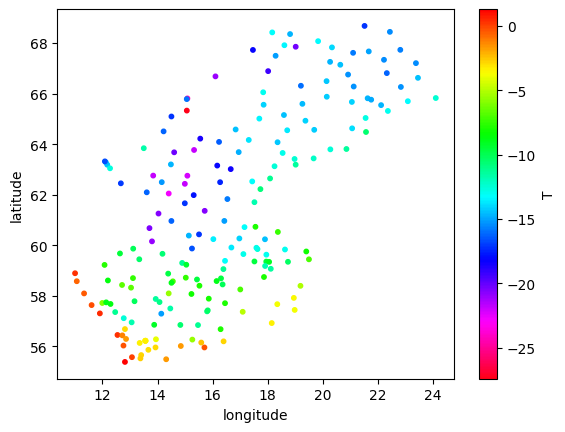

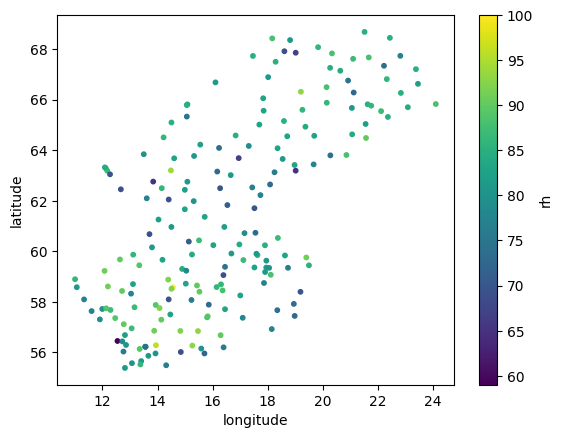

In [11]:
df8.plot.scatter(x = 'longitude', y = 'latitude', c= 'T', s = 10, colormap='hsv_r');

df8.plot.scatter(x = 'longitude', y = 'latitude', c= 'rh', s = 10, colormap='viridis');
pp.show()

In [12]:
geo=df8[['latitude','longitude','T']]
m = folium.Map(
    location=[geo.latitude.mean(), geo.longitude.mean()],tiles="Stamen Terrain",
    zoom_start=5, control_scale=True 
)

In [22]:

import branca.colormap as cm
#from matplotlib import cmm
#colormap = cm.LinearColormap(colors=['blue','red'], vmin=-30,vmax=0)
colormap = cm.LinearColormap(colors=['pink','purple','darkblue','blue','lightblue','cyan','green','lightgreen','yellow','orange','red','brown'], index=range(-40,15,5),vmin=-30,vmax=15)
#cm.linear.RdGy.to_step(10).scale(5, 100)
#colormap = cm.LinearColormap(colors='jet', index=[-20,10],vmin=-20,vmax=20)
#colormap = cm.LinearColormap(colors=['darkblue','red'], index=[-40,10],vmin=-40,vmax=10)
#lat = list(df.latitude)
#lon = list(df.longitude)
#pow = list(df.power)
dat=df8["date_x"].iloc[0]
geo=df8[['latitude','longitude','T']]
#m = folium.Map(
#    location=[geo.latitude.mean(), geo.longitude.mean()],tiles="Stamen Terrain",
#    zoom_start=7, control_scale=True 

m = folium.Map(
    location=[60, 16],tiles="Stamen Terrain",
    zoom_start=7, control_scale=True 

)
for index, location_info in geo.iterrows():
    color=colormap(location_info["T"])
    folium.CircleMarker(        
        [location_info["latitude"], location_info["longitude"]],
        radius=10,
        fill=True,
        color=color,
        fill_color=color,
        popup=location_info["T"]
    ).add_to(m)
html = f'''\
  <head><title>Temperature map</title></head>\
  <center><h2>Date: </h2>{dat}<br>\
  '''
title_html = f'''
             <head><title>Temperature map</title></head>
             '''
head_html = '''
            <center><h4 style="margin-bottom:5"; width="200px">{dat}</h4></center>
             '''

html = f'''\
<head><title>Temperature map</title></head>\
<center><h2>{dat} </h2><br /></center>\
'''

m.get_root().html.add_child(folium.Element(html))

#m.get_root().html.add_child(folium.Element(head_html))


#folium.Map(title="Your map title")



m

#m.save("index.html")


In [14]:
#m.save("index.html")


In [15]:
!pip install selenium
import io
from PIL import Image

In [16]:
img_data = m._to_png(1)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

In [17]:
var_name = 'restaurant_name'
var_loc = 'restaurant_location'
# var_picture =  <base64 image data>
html = f'''\
<h1>Name: </h1>{var_name}<br />\
<h2>Location: </h2>{var_loc}<br />\
'''
html  
## '<img ALIGN="Right" src="data:image/png;base64,{}"><h1>Name: </h1>restaurant_name<br /><h2>Location: </h2>restaurant_location<br />'  

'<h1>Name: </h1>restaurant_name<br /><h2>Location: </h2>restaurant_location<br />'

In [18]:
dat

Timestamp('2022-12-13 20:00:00')